<a href="https://colab.research.google.com/github/KalagaMadhu/SDC/blob/main/support%20vector%20machine%20examples%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

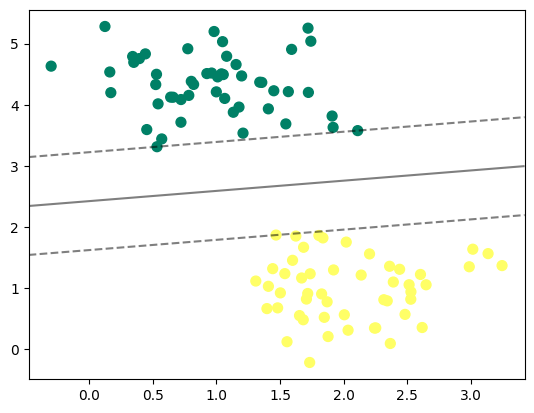

In [7]:
#Support Vector Machine
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.50)
model=SVC(kernel='linear')
model.fit(X,y)
def decision_function(model,ax=None,plot_support=True):
  if ax is None:
    ax=plt.gca()
  xlim=ax.get_xlim()
  ylim=ax.get_ylim()
  x=np.linspace(xlim[0],xlim[1],30)
  y=np.linspace(ylim[0],ylim[1],30)
  Y,X=np.meshgrid(y,x)
  xy=np.vstack([X.ravel(),Y.ravel()]).T
  P=model.decision_function(xy).reshape(X.shape)
  ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
decision_function(model)
plt.show()


predicted class for point [[7. 8.]]:2


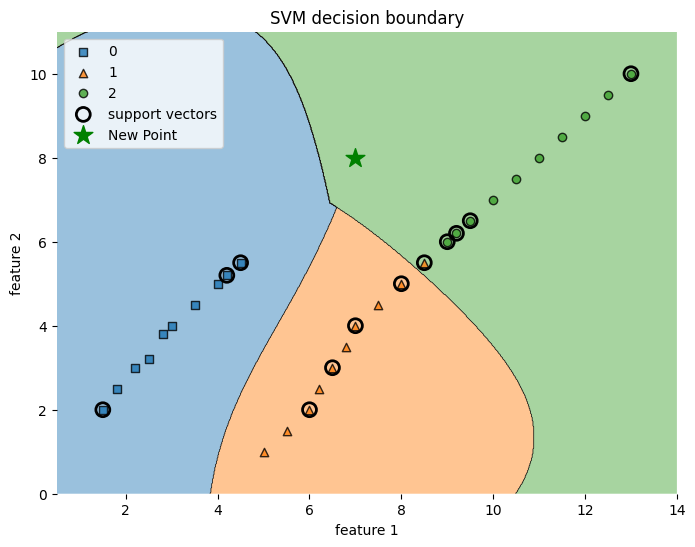

In [15]:
#svm example 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
X=np.array([
    [1.5,2.0],[1.8,2.5],[2.2,3.0],[2.5,3.2],
    [2.8,3.8],[3.0,4.0],[3.5,4.5],[4.0,5.0],
    [4.2,5.2],[4.5,5.5],[5.0,1.0],[5.5,1.5],
    [6.0,2.0],[6.2,2.5],[6.5,3.0],[6.8,3.5],
     [7.0,4.0],[7.5,4.5],[8.0,5.0],[8.5,5.5],
    [9.0,6.0],[9.2,6.2],[9.5,6.5],[10.0,7.0],
     [10.5,7.5],[11.0,8.0],[11.5,8.5],[12.0,9.0],
    [12.5,9.5],[13.0,10.0]
])
y=np.array([0,0,0,0,0,0,0,0,0,0,
            1,1,1,1,1,1,1,1,1,1,
            2,2,2,2,2,2,2,2,2,2])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
svm_model=SVC(kernel='rbf',decision_function_shape='ovo')
svm_model.fit(X_train,y_train)
new_point=np.array([[7.0,8.0]])
predicted_class=svm_model.predict(new_point)
print(f"predicted class for point {new_point}:{predicted_class[0]}")
plt.figure(figsize=(8,6))
plot_decision_regions(X=X,y=y,clf=svm_model,legend=2)
support_vectors=svm_model.support_vectors_
plt.scatter(support_vectors[:,0],support_vectors[:,1],s=100,facecolors='none',edgecolors='black',linewidth=2,label='support vectors')
plt.scatter(new_point[:,0],new_point[:,1],color='green',marker='*',s=200,label="New Point")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('SVM decision boundary')
plt.legend()
plt.show()